In [1]:
import numpy as np
from uncertainties import ufloat

#Messwerte
x_0=np.array([ufloat(441,1/2),ufloat(479,1/2),ufloat(473,1/2),ufloat(463,1/2),ufloat(468,1/2)])
x_1=np.array([ufloat(414,1/2),ufloat(453,1/2),ufloat(447,1/2),ufloat(436,1/2),ufloat(440,1/2)])
x_2=np.array([ufloat(417,1/2),ufloat(456,1/2),ufloat(450,1/2),ufloat(439,1/2),ufloat(443,1/2)])

#Dichte von Wasser bei 20 Grad Celsius
rho_o2=998

#Formel fuer Dichte des Objektes
rho=rho_o2*(x_1-x_0)/(x_1-x_2)

print(rho)

#Mittelwert (Bestwert) und Standardabweichung
print(sum(rho)/len(rho))

[8982.0+/-2009.8133136078973 8649.333333333334+/-1931.8232097115533
 8649.333333333334+/-1931.8232097115533 8982.0+/-2009.8133136078973
 9314.666666666666+/-2087.8348936661337]
(8.9+/-0.9)e+03


In [2]:
import numpy as np
from uncertainties import ufloat

#Messwerte
x_0=np.array([ufloat(449,1/2),ufloat(466,1/2),ufloat(440,1/2),ufloat(482,1/2)])
x_1=np.array([ufloat(424,1/2),ufloat(438,1/2),ufloat(414,1/2),ufloat(455,1/2)])
x_2=np.array([ufloat(427,1/2),ufloat(441,1/2),ufloat(417,1/2),ufloat(458,1/2)])

#Dichte von Objekt
rho_obj=ufloat(8900,1800)

#Formel fuer Dichte der Fluessigkeit
rho_fl=rho_obj*(x_1-x_2)/(x_1-x_0)

print(rho_fl)

#Mittelwert (Bestwert) und Standardabweichung
print(sum(rho_fl)/len(rho_fl))

[1068.0+/-321.4534790603455 953.5714285714286+/-287.8851820302507
 1026.923076923077+/-309.4241593198329
 988.8888888888889+/-298.265206056054]
(1.01+/-0.23)e+03


In [3]:
x=[1,3]
print(np.std(x,ddof=1)/np.sqrt(2))

1.0


In [4]:
from uncertainties import nominal_value
x=rho[1]
print(x.nominal_value)

8649.333333333334


In [5]:
n=np.array([8982,8649,8649,8982,9315])
print(np.mean(n),'+/-',np.std(n,ddof=1)

SyntaxError: unexpected EOF while parsing (<ipython-input-5-10636d8bc001>, line 2)

In [ ]:
n=np.array([1068,954,1027,989])
print(np.mean(n),'+/-',np.std(n,ddof=1))

In [ ]:
n=np.array([8982,8649,8649,8982,9315])
ufloat(np.mean(n),np.std(n,ddof=1))/np.sqrt(5)

In [ ]:
n=np.array([1068,954,1027,989])
ufloat(np.mean(n),np.std(n,ddof=1))/np.sqrt(4)

In [ ]:
#Wasser
import matplotlib.pyplot as plt
from scipy import interpolate
import pylab
from scipy.optimize import curve_fit

def sigmoid(x,a,b,c,d):
    return d*(1/(1+np.exp(-c*(x-a)))+b)

h1=np.array([2,4,6,8,9])
h2=np.array([2,4,5,6,8,9,10])
r1=np.array([0.26,0.33,1.25,3.9,4.75])
r2=np.array([0.23,0.25,0.3,0.83,3.85,4.6,4.7])
popt,pvoc=curve_fit(sigmoid,h1,r1)
a,b,c,d=popt
y=sigmoid(h1,a,b,c,d)
#plt.plot(h1,r1)
#plt.grid()
#plt.show()
x=h1
#y=r1
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(2, 9, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

plt.figure()
plt.plot(xnew, ynew,color='blue')
plt.plot(x, y, 'o', color='blue', label='Wasser 1')

x=h2
y=r2
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(2, 10, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)
plt.plot(xnew, ynew,color='red')
plt.plot(x, y, 'o', color='red', label='Wasser 2')
plt.grid()
plt.legend()
plt.xlabel(r'$\mathrm{H\"ohe\ [mm]}$')
plt.ylabel('Kraft [mN]')
plt.show()

In [ ]:
#Ethanol

h1=np.array([0,1,3.75,5,7,8])
h2=np.array([0,3.75,5,5.5,6,6.5])
h3=np.array([3.5,4,4.5,5,5.5,6,6.2,6.4,6.6])
r1=np.array([-0.35,-0.2,0,0.67,1.25,1.25])
r2=np.array([-0.35,0,0.85,1.1,1.3,1.35])
r3=np.array([0,0.15,0.46,1.1,1.25,1.4,1.43,1.4,1.3])

x=h1
y=r1
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 8, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)
#plt.plot(xnew, ynew,color='blue')
plt.plot(x, y, 'o', color='blue', label='Fluessigkeit 1')
def sigmoid(x,a,b,c,d):
    return d*(1/(1+np.exp(-c*(x-a)))+b)
popt,pvoc=curve_fit(sigmoid,h1,r1)
a,b,c,d=popt
r1_fit=sigmoid(np.linspace(0,10,50),a,b,c,d)
plt.plot(np.linspace(0,10,50),r1_fit,color='blue')


def sigmoid(x,a,b,c,d):
    return d*(1/(1+np.exp(-c*(x-a)))+b)
popt,pvoc=curve_fit(sigmoid,h2,r2)
a,b,c,d=popt
r2_fit=sigmoid(h2,a,b,c,d)
x=h2
#y=r2
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 6.5, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)
#plt.plot(xnew, ynew,color='red')
#plt.plot(x, y, 'x', color='red', label='Fluessigkeit 2')
plt.plot(h2,r2_fit,color='red')
print(a,b,c,d)

x=h3
y=r3
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(3.5, 6.6, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

plt.plot(xnew, ynew,color='green')
plt.plot(x, y, 'gD', color='green', label='Fluessigkeit 3')
plt.legend()
plt.xlabel(r'$\mathrm{H\"ohe\ [mm]}$')
plt.ylabel(r'Kraft [mN]')
plt.grid()
plt.show()

5.162208690929833


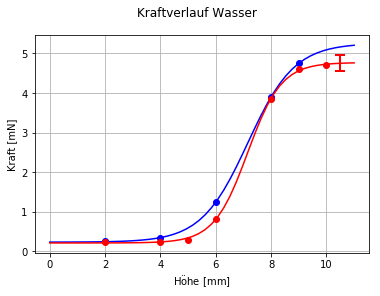

4.749176204601117


<ErrorbarContainer object of 3 artists>

In [43]:
#Wasser
import matplotlib.pyplot as plt
from scipy import interpolate
import pylab
from scipy.optimize import curve_fit
from pylab import savefig

def sigmoid(x,a,b,c,d):
    return d*(1/(1+np.exp(-c*(x-a))))+b

h1=np.array([2,4,6,8,9])
h2=np.array([2,4,5,6,8,9,10])
r1=np.array([0.26,0.33,1.25,3.9,4.75])
r2=np.array([0.23,0.25,0.3,0.83,3.85,4.6,4.7])
popt,pvoc=curve_fit(sigmoid,h1,r1,method='dogbox')
a,b,c,d=popt
r1_fit=sigmoid(np.linspace(0,11,50),a,b,c,d)
plt.plot(np.linspace(0,11,50),r1_fit,color='blue')
plt.plot(h1,r1,color='blue',marker='o',LineStyle='none')
print(sigmoid(10.5,a,b,c,d))

popt,pvoc=curve_fit(sigmoid,h2,r2,method='dogbox')
a,b,c,d=popt
r2_fit=sigmoid(np.linspace(0,11,50),a,b,c,d)
plt.plot(np.linspace(0,11,50),r2_fit,color='red')
plt.plot(h2,r2,color='red',marker='o',LineStyle='none')

plt.suptitle('Kraftverlauf Wasser')
plt.xlabel(r'$\mathrm{H\"ohe\ [mm]}$')
plt.ylabel(r'Kraft [mN]')
plt.grid()
plt.show()
print(sigmoid(10.5,a,b,c,d))
x=[10.5]
y=[sigmoid(x,a,b,c,d)]
plt.errorbar(x,y,[0.2],capsize=5,elinewidth=2,markeredgewidth=2,ecolor='red')

In [ ]:
#Ethanol
h1=np.array([0,1,3.75,5,7,8])
h2=np.array([0,3.75,5,5.5,6,6.5])
h3=np.array([3.5,4,4.5,5,5.5,6,6.2,6.4,6.6])
r1=np.array([-0.35,-0.2,0,0.67,1.25,1.25])
r2=np.array([-0.35,0,0.85,1.1,1.3,1.35])
r3=np.array([0,0.15,0.46,1.1,1.25,1.4,1.43,1.4,1.3])
popt,pvoc=curve_fit(sigmoid,h1,r1,method='dogbox')
a,b,c,d=popt
r1_fit=sigmoid(np.linspace(0,10,50),a,b,c,d)
plt.plot(np.linspace(0,10,50),r1_fit,color='blue')
plt.plot(h1,r1,color='blue',marker='o',LineStyle='none')

popt,pvoc=curve_fit(sigmoid,h2,r2,method='dogbox')
a,b,c,d=popt
r2_fit=sigmoid(np.linspace(0,10,50),a,b,c,d)
plt.plot(np.linspace(0,10,50),r2_fit,color='red')
plt.plot(h2,r2,color='red',marker='o',LineStyle='none')

popt,pvoc=curve_fit(sigmoid,h3,r3,method='dogbox')
a,b,c,d=popt
r3_fit=sigmoid(np.linspace(0,10,50),a,b,c,d)
plt.plot(np.linspace(0,10,50),r3_fit,color='green')
plt.plot(h3,r3,color='green',marker='o',LineStyle='none')

plt.suptitle('Kraftverlauf Ethanol')
plt.xlabel(r'$\mathrm{H\"ohe\ [mm]}$')
plt.ylabel(r'Kraft [mN]')
plt.grid()
plt.show()